# 簡介

## 加入類別不平衡處理，使用 BorderlineSMOTE

### 程式依序為：載入library、讀取訓練資料、檢查缺失值、檢查離群值、檢查異常值、分割X、Y、分割10份交叉驗證(K-Fold)與建模、計算交叉驗證結果的平均值。

## 載入lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB,ComplementNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from sklearn.base import clone

from imblearn.over_sampling import BorderlineSMOTE 

import seaborn as sns

# 讀取 訓練資料


In [2]:
df = pd.read_csv('train.csv')
df

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,8773,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3.0,11.0,3.0,7.0,2.0,0,0
1,6709,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1.0,10.0,0.0,8.0,2.0,0,0
2,1463,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1.0,10.0,0.0,14.0,2.0,0,0
3,4095,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5.0,10.0,0.0,7.0,2.0,0,0
4,3346,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1.0,1.0,0.0,7.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,3758,0,0.000000,0,0.0,4,81.000000,0.000000,0.050000,0.000000,0.4,2,1.0,1.0,5.0,7.0,2.0,0,0
8096,4437,1,15.200000,2,62.6,84,4941.698611,0.017647,0.038706,0.000000,0.0,6,3.0,11.0,1.0,8.0,2.0,0,0
8097,7449,0,0.000000,0,0.0,25,701.883333,0.000000,0.023333,0.000000,0.0,6,1.0,10.0,0.0,4.0,2.0,0,0
8098,665,9,183.785714,1,90.0,95,3346.501984,0.002118,0.018656,5.932009,0.0,8,5.0,10.0,5.0,4.0,2.0,0,1


## miss values
## 統計缺失值

In [3]:
df.isna().sum()

ID                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    1
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           1
Browser                    1
Region                     1
TrafficType                1
VisitorType                1
Weekend                    0
Revenue                    0
dtype: int64

In [4]:
### 檢視缺失值資料
df[df.isna().any(axis=1)]

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4316,7,6,999.000000,0,0.0,14,211.470238,0.001190,0.039521,0.0,0.0,8,NaN,10.0,1.0,5.0,2.0,0,0
5378,1,1,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.6,2,3.0,NaN,NaN,NaN,NaN,0,0
7838,5,7,245.333333,0,0.0,5,NaN,0.027273,0.051818,0.0,0.0,2,3.0,3.0,6.0,12.0,2.0,0,0


In [5]:
### 取出非缺失值資料
df1=df[df.notna().all(axis=1)]
df1

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,8773,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3.0,11.0,3.0,7.0,2.0,0,0
1,6709,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1.0,10.0,0.0,8.0,2.0,0,0
2,1463,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1.0,10.0,0.0,14.0,2.0,0,0
3,4095,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5.0,10.0,0.0,7.0,2.0,0,0
4,3346,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1.0,1.0,0.0,7.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,3758,0,0.000000,0,0.0,4,81.000000,0.000000,0.050000,0.000000,0.4,2,1.0,1.0,5.0,7.0,2.0,0,0
8096,4437,1,15.200000,2,62.6,84,4941.698611,0.017647,0.038706,0.000000,0.0,6,3.0,11.0,1.0,8.0,2.0,0,0
8097,7449,0,0.000000,0,0.0,25,701.883333,0.000000,0.023333,0.000000,0.0,6,1.0,10.0,0.0,4.0,2.0,0,0
8098,665,9,183.785714,1,90.0,95,3346.501984,0.002118,0.018656,5.932009,0.0,8,5.0,10.0,5.0,4.0,2.0,0,1


In [6]:
### 刪除ID
df1=df1.drop(columns=['ID'])
df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3.0,11.0,3.0,7.0,2.0,0,0
1,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1.0,10.0,0.0,8.0,2.0,0,0
2,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1.0,10.0,0.0,14.0,2.0,0,0
3,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5.0,10.0,0.0,7.0,2.0,0,0
4,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1.0,1.0,0.0,7.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,0,0.000000,0,0.0,4,81.000000,0.000000,0.050000,0.000000,0.4,2,1.0,1.0,5.0,7.0,2.0,0,0
8096,1,15.200000,2,62.6,84,4941.698611,0.017647,0.038706,0.000000,0.0,6,3.0,11.0,1.0,8.0,2.0,0,0
8097,0,0.000000,0,0.0,25,701.883333,0.000000,0.023333,0.000000,0.0,6,1.0,10.0,0.0,4.0,2.0,0,0
8098,9,183.785714,1,90.0,95,3346.501984,0.002118,0.018656,5.932009,0.0,8,5.0,10.0,5.0,4.0,2.0,0,1


# 檢查離群值（outlier）

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,8097.0,2.309003,3.311535e+00,0.0,0.000000,1.000000,4.000000,2.700000e+01
Administrative_Duration,8097.0,80.802419,1.798223e+02,0.0,0.000000,7.000000,91.888889,3.398750e+03
Informational,8097.0,0.498209,1.258284e+00,0.0,0.000000,0.000000,0.000000,2.400000e+01
Informational_Duration,8097.0,32.896484,1.352345e+02,0.0,0.000000,0.000000,0.000000,2.549375e+03
ProductRelated,8097.0,31.796468,4.496670e+01,0.0,7.000000,18.000000,38.000000,7.050000e+02
ProductRelated_Duration,8097.0,83135.989140,6.359881e+06,0.0,183.833333,599.000000,1462.450000,5.634924e+08
BounceRates,8097.0,0.020324,1.319578e-01,-11.0,0.000000,0.003200,0.016923,2.000000e-01
ExitRates,8097.0,0.042678,4.791996e-02,0.0,0.014286,0.025121,0.050000,2.000000e-01
PageValues,8097.0,5.746534,1.794355e+01,0.0,0.000000,0.000000,0.000000,2.879538e+02
SpecialDay,8097.0,0.060417,1.977529e-01,0.0,0.000000,0.000000,0.000000,1.000000e+00


In [8]:
# 找出前2筆 ，看似outlier
df1['ProductRelated_Duration'].sort_values(ascending=False).head(10)

408     5.634924e+08
3953    1.000000e+08
7397    6.397352e+04
2318    4.317123e+04
6998    2.484416e+04
2115    2.388881e+04
2363    2.334208e+04
7392    2.305010e+04
8079    2.185705e+04
4760    2.167224e+04
Name: ProductRelated_Duration, dtype: float64

# 檢查異常值

In [9]:
# 找出小於0的資料，比率小於0不合理
df1[df1['BounceRates']<0]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
184,1,7.0,0,0.0,50,2330.727381,-1.0,0.031399,0.0,0.0,8,5.0,10.0,6.0,12.0,2.0,0,0
7147,0,0.0,1,1729.0,19,1401.083333,-11.0,0.050000,0.0,0.0,9,1.0,10.0,0.0,12.0,2.0,0,0


In [10]:
#  13月 不存在
df1['Month'].value_counts()

2     2202
8     1951
1     1265
9     1140
7      355
6      290
4      288
5      284
3      190
0      131
13       1
Name: Month, dtype: int64

In [11]:
# 標記是否存在100，不合理
df1['Weekend'].value_counts()

0      6145
1      1951
100       1
Name: Weekend, dtype: int64

In [12]:
df1[df1['Weekend']==100]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1666,0,0.0,0,0.0,22,2189.5,0.009524,0.028571,0.0,0.0,8,0.0,10.0,0.0,5.0,2.0,100,0


In [13]:
df2=df1.drop(index=[408,3953,184,7147,7714,1666])
df2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3.0,11.0,3.0,7.0,2.0,0,0
1,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1.0,10.0,0.0,8.0,2.0,0,0
2,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1.0,10.0,0.0,14.0,2.0,0,0
3,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5.0,10.0,0.0,7.0,2.0,0,0
4,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1.0,1.0,0.0,7.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,0,0.000000,0,0.0,4,81.000000,0.000000,0.050000,0.000000,0.4,2,1.0,1.0,5.0,7.0,2.0,0,0
8096,1,15.200000,2,62.6,84,4941.698611,0.017647,0.038706,0.000000,0.0,6,3.0,11.0,1.0,8.0,2.0,0,0
8097,0,0.000000,0,0.0,25,701.883333,0.000000,0.023333,0.000000,0.0,6,1.0,10.0,0.0,4.0,2.0,0,0
8098,9,183.785714,1,90.0,95,3346.501984,0.002118,0.018656,5.932009,0.0,8,5.0,10.0,5.0,4.0,2.0,0,1


In [14]:
# 標記轉型整數
df2.loc()[:,'OperatingSystems':'Revenue'] = df2.loc()[:,'OperatingSystems':'Revenue'].astype(int)
df2.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int32
Browser                      int32
Region                       int32
TrafficType                  int32
VisitorType                  int32
Weekend                      int32
Revenue                      int32
dtype: object

In [15]:
# 檢查敘述統計資料
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,8091.0,2.309974,3.312422,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,8091.0,80.816523,179.872842,0.0,0.000000,7.000000,91.861111,3398.750000
Informational,8091.0,0.498331,1.258677,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,8091.0,32.701005,133.961624,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,8091.0,31.802249,44.981306,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,8091.0,1193.079277,1952.936206,0.0,183.687500,598.783333,1461.145833,63973.522230
BounceRates,8091.0,0.021821,0.047777,0.0,0.000000,0.003215,0.016926,0.200000
ExitRates,8091.0,0.042690,0.047935,0.0,0.014286,0.025121,0.050000,0.200000
PageValues,8091.0,5.750796,17.949520,0.0,0.000000,0.000000,0.000000,287.953793
SpecialDay,8091.0,0.060462,0.197819,0.0,0.000000,0.000000,0.000000,1.000000


## 檢視 Revenue 比例(類別不平衡)

In [16]:
df2['Revenue'].value_counts()

0    6814
1    1277
Name: Revenue, dtype: int64

# 加入類別不平衡處理，使用 BorderlineSMOTE

In [17]:
X= df2.loc()[:,:'Weekend']
Y= df2.loc()[:,'Revenue']

In [18]:
sm = BorderlineSMOTE(random_state=36,sampling_strategy='minority')
X_res, Y_res = sm.fit_resample(X, Y)

In [19]:
X_res

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3,11,3,7,2,0
1,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1,10,0,8,2,0
2,9,301.000000,0,0.000000,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1,10,0,14,2,0
3,2,13.333333,0,0.000000,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5,10,0,7,2,0
4,0,0.000000,0,0.000000,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1,1,0,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13623,4,67.199573,0,0.000000,38,2431.637282,0.001183,0.022266,86.271266,0.0,8,1,10,3,6,2,0
13624,0,0.000000,1,53.476379,114,4751.030576,0.002249,0.012910,3.696034,0.0,8,2,10,0,4,1,0
13625,6,148.588663,0,7.862393,35,2207.241354,0.002356,0.011626,35.216798,0.0,1,0,10,1,2,2,0
13626,0,40.125100,1,18.457546,83,4462.385912,0.002214,0.014384,0.000000,0.0,8,1,10,2,4,2,0


In [20]:
Y_res

0        0
1        0
2        0
3        0
4        0
        ..
13623    1
13624    1
13625    1
13626    1
13627    1
Name: Revenue, Length: 13628, dtype: int32

# 建模

In [21]:
# 不使用 SVM 是因為，績效沒有比較高，且較耗時。

model_dict={'RandomForest':RandomForestClassifier(random_state=0, verbose=0),
            'GradientBoosting':GradientBoostingClassifier(random_state=0, verbose=0),
            'ExtraTrees':ExtraTreesClassifier(n_jobs=8,random_state=0, verbose=0),
            'KNN':KNeighborsClassifier(),
#             'SVM':SVC(probability=True),
}


In [22]:

def model_score(Y_test, y_pred,model):
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    df_report1 = pd.DataFrame( 
        [[model,
          accuracy_score(Y_test, y_pred),
          precision_score(Y_test, y_pred),
          recall_score(Y_test, y_pred),
          (tn/(tn+fp)),
          f1_score(Y_test, y_pred),
          tn, fp, fn, tp
          ]])
    df_report1.columns = [
        'model',
        'accuracy',
        'precision',
        'recall/Sensitivity',
        'Specificity ',
        'f1_score',
        'tn', 'fp', 'fn', 'tp'
    ]
    return df_report1



kf = KFold(n_splits=10,random_state=0, shuffle=True)

model_score_list=[]
for key in model_dict.keys():
    
    print(f'{key} start')
    i=1
    for train_index, test_index in kf.split(X_res, Y_res): 
        temp=clone(model_dict[key])
        X_train, X_test = X_res.iloc()[train_index,:], X_res.iloc()[test_index,:]
        Y_train, Y_test = Y_res.iloc()[train_index], Y_res.iloc()[test_index]
        temp.fit(X_train,Y_train)
        Y_pred = temp.predict(X_test)
        model_score_temp = model_score(Y_test, Y_pred,key)
        model_score_temp['estimator'] = [temp]
        model_score_temp.index = [i]
        model_score_list.append(model_score_temp)
        i+=1
    print(f'{key} OK')


RandomForest start
RandomForest OK
GradientBoosting start
GradientBoosting OK
ExtraTrees start
ExtraTrees OK
KNN start
KNN OK


In [23]:
df_model_score=pd.concat(model_score_list)
df_model_score

,model,accuracy,precision,recall/Sensitivity,Specificity,f1_score,tn,fp,fn,tp,estimator
1,RandomForest,0.937638,0.926630,0.956522,0.916923,0.941339,596,54,31,682,"(DecisionTreeClassifier(max_features='auto', r..."
2,RandomForest,0.939839,0.929068,0.955651,0.923193,0.942172,613,51,31,668,"(DecisionTreeClassifier(max_features='auto', r..."
3,RandomForest,0.940572,0.917496,0.965569,0.916547,0.940919,637,58,23,645,"(DecisionTreeClassifier(max_features='auto', r..."
4,RandomForest,0.940572,0.927641,0.953869,0.927641,0.940572,641,50,31,641,"(DecisionTreeClassifier(max_features='auto', r..."
5,RandomForest,0.922230,0.896978,0.954678,0.889543,0.924929,604,75,31,653,"(DecisionTreeClassifier(max_features='auto', r..."
6,RandomForest,0.937638,0.924444,0.948328,0.927660,0.936234,654,51,34,624,"(DecisionTreeClassifier(max_features='auto', r..."
7,RandomForest,0.945708,0.933975,0.963121,0.927052,0.948324,610,48,26,679,"(DecisionTreeClassifier(max_features='auto', r..."
8,RandomForest,0.929567,0.909972,0.954942,0.903704,0.931915,610,65,31,657,"(DecisionTreeClassifier(max_features='auto', r..."
9,RandomForest,0.939060,0.922388,0.952234,0.927069,0.937074,661,52,31,618,"(DecisionTreeClassifier(max_features='auto', r..."
10,RandomForest,0.931718,0.913720,0.952802,0.910819,0.932852,623,61,32,646,"(DecisionTreeClassifier(max_features='auto', r..."


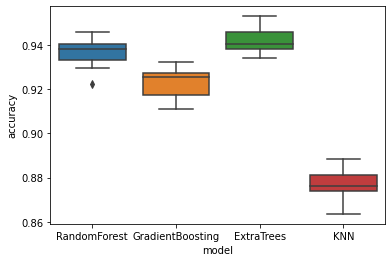

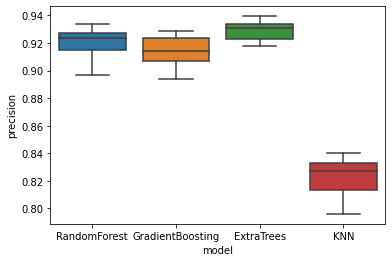

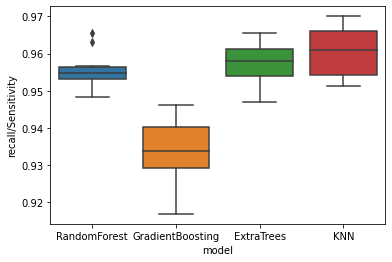

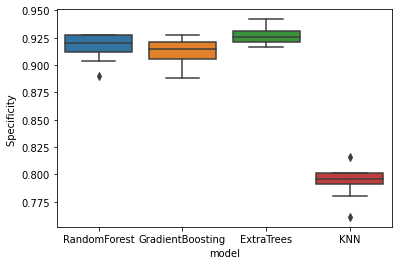

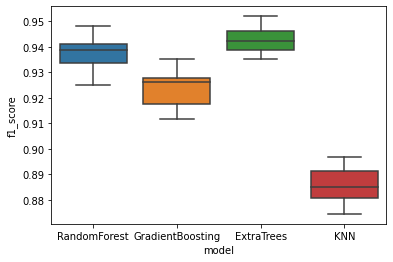

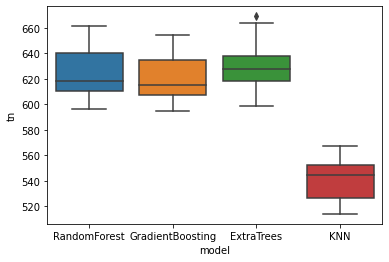

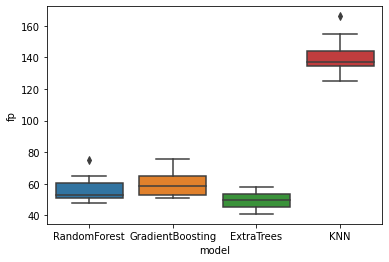

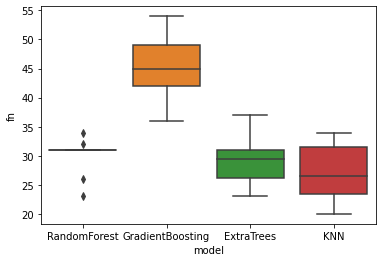

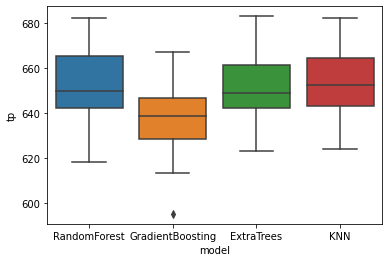

In [24]:
for col in df_model_score.columns[1:-1]:
    sns.boxplot(x="model", y=col, data=df_model_score)
    plt.show()

## 針對同一類型的分類器(10個分類器)的績效取平均，f1_score 最高的當作使用的模型。

In [25]:
df_model_score_mean=df_model_score.groupby('model').mean()
df_model_score_mean

,accuracy,precision,recall/Sensitivity,Specificity,f1_score,tn,fp,fn,tp
model,,,,,,,,,
ExtraTrees,0.942105,0.928975,0.957500,0.926686,0.943003,631.5,49.9,29.0,652.4
GradientBoosting,0.923099,0.914110,0.933884,0.912226,0.923846,621.6,59.8,45.0,636.4
KNN,0.876798,0.822899,0.960297,0.793466,0.886207,540.6,140.8,27.1,654.3
RandomForest,0.936454,0.920231,0.955772,0.917015,0.937633,624.9,56.5,30.1,651.3


## 檢驗資料使用有無重疊

In [26]:
(df_model_score.loc()[:,['model','tn','fp','fn','tp']].groupby('model').sum()).sum(axis=1)

model
ExtraTrees          13628
GradientBoosting    13628
KNN                 13628
RandomForest        13628
dtype: int64

In [27]:
# scores_list=[]
# for key in model_dict.keys():
#     temp=model_dict[key]
#     print(f'{key} start')
#     scores = cross_validate(temp, X, Y, cv=10,
#                          scoring=('accuracy','precision','recall','roc_auc','f1'),
#                          return_estimator=True)
#     scores_list.append(pd.DataFrame.from_dict(scores))
#     print(f'{key} OK')

# df_scores= pd.concat(scores_list)
# df_scores

## 以下為使用10個分類器預測測試資料，取10個分類器預測結果的眾數值當分類結果

In [28]:
df_predict = pd.DataFrame()
for model_str in  df_model_score_mean.index:
    print(model_str)
    for i in range(1,11):
        temp   = df_model_score[df_model_score['model']==model_str]['estimator'][i].predict(X)
        df_temp = pd.DataFrame(temp)
        y_pred = df_temp.mode(1)[0]
        df_predict[model_str]=y_pred

ExtraTrees
GradientBoosting
KNN
RandomForest


In [29]:
df_predict

,ExtraTrees,GradientBoosting,KNN,RandomForest
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
8086,0,0,0,0
8087,0,0,0,0
8088,0,0,0,0
8089,1,1,1,1


In [30]:
df_predict['label']=Y.to_numpy()
df_predict

,ExtraTrees,GradientBoosting,KNN,RandomForest,label
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
8086,0,0,0,0,0
8087,0,0,0,0,0
8088,0,0,0,0,0
8089,1,1,1,1,1


In [31]:
model_score_list=[]
for model_str in  df_model_score_mean.index:
    model_score_list.append(model_score(df_predict['label'], df_predict[model_str],model_str))
    

In [32]:
df_model_score=pd.concat(model_score_list)
df_model_score

,model,accuracy,precision,recall/Sensitivity,Specificity,f1_score,tn,fp,fn,tp
0,ExtraTrees,0.989742,0.958525,0.977291,0.992075,0.967817,6760,54,29,1248
0,GradientBoosting,0.898282,0.647786,0.779170,0.920605,0.707430,6273,541,282,995
0,KNN,0.851687,0.516849,0.924824,0.837981,0.663111,5710,1104,96,1181
0,RandomForest,0.988877,0.953400,0.977291,0.991048,0.965197,6753,61,29,1248
